In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, variables as v

In [3]:
# Load the database
db_sgte = Database('Cr-Fe-ref2.TDB')
sorted(db_sgte.phases)

['A1', 'A2', 'BCC2', 'CHI', 'FCC2', 'LIQUID', 'R3BIS', 'SIGMA3']

/Users/sunhui/opt/anaconda3/envs/PDUQ/lib/python3.6/site-packages/pycalphad/core/lower_convex_hull.py:136: RuntimeWarning: invalid value encountered in double_scalars
  result_array_GM_values[it.multi_index] = new_energy / molesum


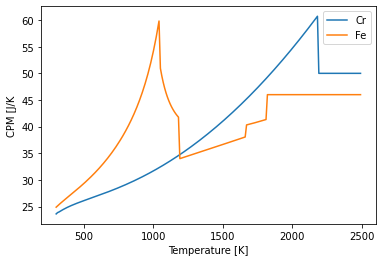

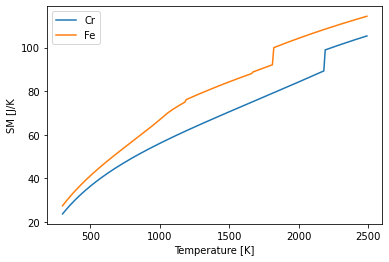

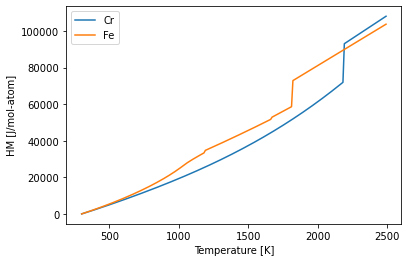

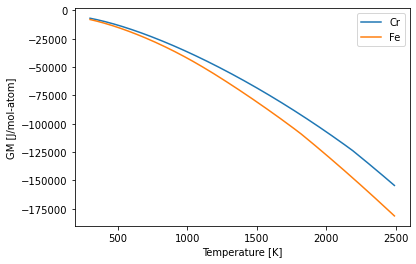

In [6]:
#plot could be changed to HM, GM and CPM by change the output type in the codes
equil_result = equilibrium(db_sgte, ['CR','FE','VA'], sorted(db_sgte.phases), {v.X('CR'): 1,v.N: 1,v.P: 101325,v.T: (300, 2500,10),}, output=['GM','SM','HM','CPM'])

equil_result2 = equilibrium(db_sgte, ['CR','FE','VA'], sorted(db_sgte.phases), {v.X('FE'): 1,v.N: 1,v.P: 101325,v.T: (300, 2500,10),}, output=['GM','SM','HM','CPM'])

# Squeeze is required because the array corresponding to HM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(equil_result.T, equil_result.CPM.squeeze(),label='Cr')
plt.plot(equil_result2.T, equil_result2.CPM.squeeze(),label='Fe')
plt.xlabel("Temperature [K]")
plt.ylabel("CPM [J/K")
plt.legend()
plt.show()
plt.plot(equil_result.T, equil_result.SM.squeeze(),label='Cr')
plt.plot(equil_result2.T, equil_result2.SM.squeeze(),label='Fe')
plt.xlabel("Temperature [K]")
plt.ylabel("SM [J/K")
plt.legend()
plt.show()
plt.plot(equil_result.T, equil_result.HM.squeeze(),label='Cr')
plt.plot(equil_result2.T, equil_result2.HM.squeeze(),label='Fe')
plt.xlabel("Temperature [K]")
plt.ylabel("HM [J/mol-atom]")
plt.legend()
plt.show()
plt.plot(equil_result.T, equil_result.GM.squeeze(),label='Cr')
plt.plot(equil_result2.T, equil_result2.GM.squeeze(),label='Fe')
plt.xlabel("Temperature [K]")
plt.ylabel("GM [J/mol-atom]")
plt.legend()
plt.show()
